# Homework_3_432001358_CSCE_633_600
## November 12, 2021
## CSCE 633 600 (Machine Learning) Homework 3
### Name: Rohan Chaudhury
### UIN: 432001358


### Question 1: Machine learning for facial emotion recognition
In this problem, we will process face images coming from the Facial Expression Recognition
Challenge (presented in the International Conference of Machine Learning in 2013). The data
is uploaded under Homework3 folder in the shared Google Drive. You are given three sets of
data: training set (i.e., Q1 Train Data.csv), testing set (i.e., Q1 Test Data.csv), and validation
set (i.e., Q1 Validation Data.csv).
The data consists of 48X48 pixel grayscale images of faces. The faces have been automatically registered so that the face is more or less centered and occupies about the same amount
of space in each image. The task is to categorize each face based on the emotion shown in the
facial expression in seven categories. More information on the data can also be found in this
link.
All three files contain two columns:
1. The column labeled as "emotion" contains the emotion class with numeric code ranging
from 0 to 6 (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral).
2. The column labeled as "pixels" contains the 2304 (i.e., 48 X 48) space-separated pixel
values of the image in row-wise order, i.e., the first 48 numbers correspond to the first row
of the image, the next 48 numbers to the second row of the image, etc.

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import tensorflow as tf


train_data = pd.read_csv('Q1_Train_Data.csv')
test_data = pd.read_csv('Q1_Test_Data.csv')
validation_data = pd.read_csv('Q1_Validation_Data.csv')

print (" ")
print("Shape of Train Data: {}".format(train_data.shape))
print (" ")
print("Shape of Test Data: {}".format(test_data.shape))
print (" ")
print("Shape of Validation Data: {}".format(validation_data.shape))
print (" ")
print(train_data.head)




 
Shape of Train Data: (28709, 2)
 
Shape of Test Data: (3589, 2)
 
Shape of Validation Data: (3589, 2)
 
<bound method NDFrame.head of        emotion                                             pixels
0            0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1            0  151 150 147 155 148 133 111 140 170 174 182 15...
2            2  231 212 156 164 174 138 161 173 182 200 106 38...
3            4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4            6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
...        ...                                                ...
28704        2  84 85 85 85 85 85 85 85 86 86 86 87 86 86 91 9...
28705        0  114 112 113 113 111 111 112 113 115 113 114 11...
28706        4  74 81 87 89 95 100 98 93 105 120 127 133 146 1...
28707        0  222 227 203 90 86 90 84 77 94 87 99 119 134 14...
28708        4  195 199 205 206 205 203 206 209 208 210 212 21...

[28709 rows x 2 columns]>


### (a) (1 points) Visualization: Randomly select and visualize 1-2 images per emotion. Note: You can find a useful link on image pre-processing here: https://www.tensorflow.org/api_docs/python/tf/image/per_image_standardization 

In [3]:
def string_to_int(st):
  ar= list((int(x)/255 - 0.5)  for x in st.split(' '))
  return ar

def get_pixels_int(df):
  df['pixels_int']=df.apply(lambda st: np.array(string_to_int(st['pixels'])),axis=1)

get_pixels_int(train_data)
get_pixels_int(test_data)
get_pixels_int(validation_data)


print(train_data.head)




<bound method NDFrame.head of        emotion  ...                                         pixels_int
0            0  ...  [-0.22549019607843135, -0.18627450980392157, -...
1            0  ...  [0.09215686274509804, 0.08823529411764708, 0.0...
2            2  ...  [0.40588235294117647, 0.3313725490196079, 0.11...
3            4  ...  [-0.40588235294117647, -0.37450980392156863, -...
4            6  ...  [-0.4843137254901961, -0.5, -0.5, -0.5, -0.5, ...
...        ...  ...                                                ...
28704        2  ...  [-0.17058823529411765, -0.16666666666666669, -...
28705        0  ...  [-0.052941176470588214, -0.0607843137254902, -...
28706        4  ...  [-0.20980392156862743, -0.1823529411764706, -0...
28707        0  ...  [0.37058823529411766, 0.3901960784313725, 0.29...
28708        4  ...  [0.2647058823529411, 0.2803921568627451, 0.303...

[28709 rows x 3 columns]>


<Figure size 28800x28800 with 0 Axes>

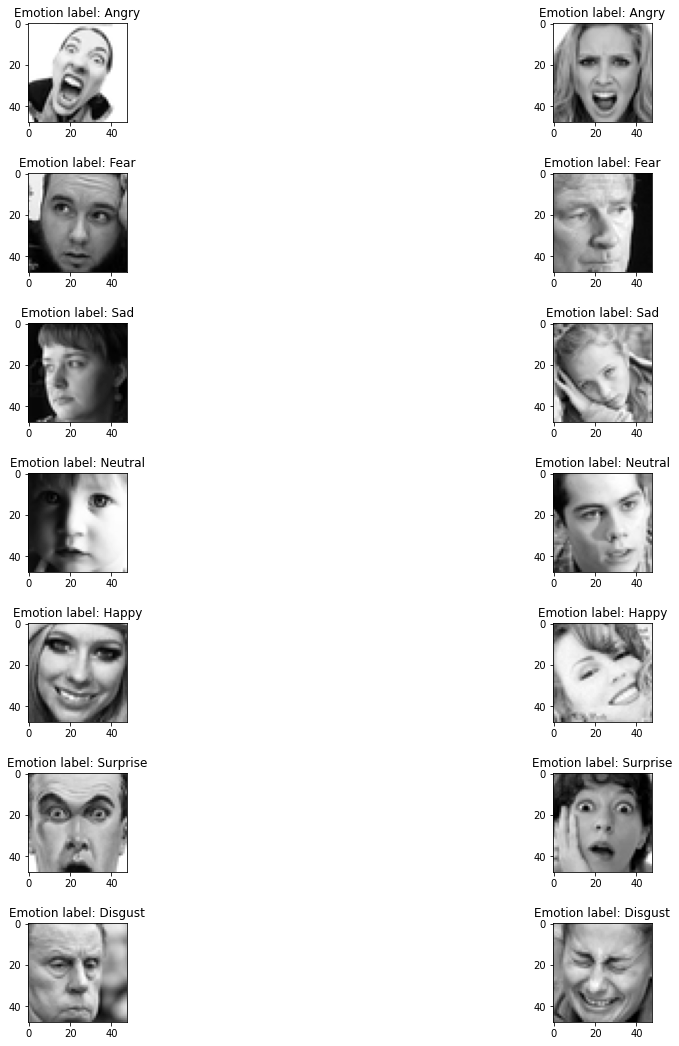

In [7]:
# plt.rcParams["figure.figsize"] = (2,300)

plt.figure(figsize=(400,400))

emotion_category={0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}

emotions= train_data['emotion'].unique().tolist()

fig, ax=plt.subplots(len(emotions),2,figsize=(15,15))
fig.tight_layout(pad=3.0)
# print (emotions)
plot_num=0
for emotion in emotions:
  imgs=train_data[train_data["emotion"]==emotion]
  samples=imgs.sample(n=2)
  for i in range(samples.shape[0]):
    img=samples.iloc[i]
    ax[int(plot_num/2),plot_num%2].set_title("Emotion label: {}".format(emotion_category[emotion]))
    ax[int(plot_num/2),plot_num%2].imshow(np.array(img['pixels_int']).reshape(48,48),cmap=plt.get_cmap('gray'))
    plot_num+=1

  

### (b) (1 points) Data exploration: Count the number of samples per emotion in the training data.

In [8]:
samples_count=train_data.groupby(['emotion']).count()
samples_count=samples_count[['pixels']].rename({'pixels': 'size'}, axis=1)  
samples_count

,size
emotion,
0,3995
1,436
2,4097
3,7215
4,4830
5,3171
6,4965


### (c) (4 points) Image classification with FNNs: In this part, you will use a feedforward neural network (FNN) (also called multilayer perceptron") to perform the emotion classification task. The input of the FNN comprises of all the pixels of the image.



In [9]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers

train_emotions=np.array(list(train_data['emotion']))
train_pixels=np.array(list(train_data['pixels_int']))


import time

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []
        self.epoch_time_start = time.time()
    # def on_epoch_begin(self, epoch, logs={}):
    #     self.epoch_time_start = time.time()

    def on_train_end(self, epoch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)



model1 = Sequential([
  Dense(784*2, activation='relu', input_shape=(48*48,), name="first_hidden_layer"),
  Dense(784, activation='relu', name="second_hidden_layer"),
  Dense(784//2, activation='relu', name="third_hidden_layer"),
  Dense(784//4, activation='relu', name="fourth_hidden_layer"),
  Dense(len(emotions), activation='softmax'),
])

model2 = Sequential([
  Dense(784*2, activation='elu', input_shape=(48*48,), name="first_hidden_layer"),
  Dense(784, activation='elu', name="second_hidden_layer"),
  Dense(784//2, activation='elu', name="third_hidden_layer"),
  Dropout(0.25),
  Dense(len(emotions), activation='softmax'),
])


model3 = Sequential([
  Dense(2000, activation='elu', input_shape=(48*48,), name="first_hidden_layer"),
  Dense(1000, activation='elu', name="second_hidden_layer"),
  Dense(500, activation='elu', name="third_hidden_layer"),
  Dropout(0.25),
  Dense(len(emotions), activation='softmax'),
])


model4 = Sequential([
  Dense(2000, activation='elu', input_shape=(48*48,), name="first_hidden_layer"),
  Dense(1000, activation='elu', name="second_hidden_layer"),
  Dense(500, activation='elu', name="third_hidden_layer"),
  Dense(250, activation='elu', name="fourth_hidden_layer"),
  Dense(784, activation='relu', name="fifth_hidden_layer"),
  Dropout(0.25),
  Dense(len(emotions), activation='softmax'),
])


model5 = Sequential([
  Dense(2000, activation='elu', input_shape=(48*48,), name="first_hidden_layer", kernel_regularizer=regularizers.l2(0.0001)),
  Dense(1000, activation='elu', name="second_hidden_layer", kernel_regularizer=regularizers.l2(0.0001)),
  Dense(500, activation='elu', name="third_hidden_layer", kernel_regularizer=regularizers.l2(0.0001)),
  Dense(250, activation='elu', name="fourth_hidden_layer", kernel_regularizer=regularizers.l2(0.0001)),
  Dropout(0.25),
  Dense(len(emotions), activation='softmax'),
])









In [10]:
time_callback = TimeHistory()

model1.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
model2.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
model3.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
model4.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
model5.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])



print("Train image shape: ", train_pixels.shape)
print(train_emotions.shape)

time_to_train=[]
flatten_train_images = train_pixels

history1=model1.fit(np.array(flatten_train_images), to_categorical(train_emotions), epochs=20, batch_size=256,callbacks = [time_callback])
time_to_train.append(time_callback.times)


history2=model2.fit(np.array(flatten_train_images), to_categorical(train_emotions), epochs=20, batch_size=256,callbacks = [time_callback])
time_to_train.append(time_callback.times)
history3=model3.fit(np.array(flatten_train_images), to_categorical(train_emotions), epochs=20, batch_size=256,callbacks = [time_callback])
time_to_train.append(time_callback.times)
history4=model4.fit(np.array(flatten_train_images), to_categorical(train_emotions), epochs=20, batch_size=256,callbacks = [time_callback])
time_to_train.append(time_callback.times)
history5=model5.fit(np.array(flatten_train_images), to_categorical(train_emotions), epochs=20, batch_size=256,callbacks = [time_callback])
time_to_train.append(time_callback.times)



Train image shape:  (28709, 2304)
(28709,)
Epoch 1/20
113/113 [==============================] - 4s 11ms/step - loss: 1.6840 - accuracy: 0.3310
Epoch 2/20
113/113 [==============================] - 1s 11ms/step - loss: 1.5542 - accuracy: 0.3973
Epoch 3/20
113/113 [==============================] - 1s 10ms/step - loss: 1.4730 - accuracy: 0.4306
Epoch 4/20
113/113 [==============================] - 1s 10ms/step - loss: 1.4030 - accuracy: 0.4601
Epoch 5/20
113/113 [==============================] - 1s 10ms/step - loss: 1.3249 - accuracy: 0.4910
Epoch 6/20
113/113 [==============================] - 1s 10ms/step - loss: 1.2336 - accuracy: 0.5309
Epoch 7/20
113/113 [==============================] - 1s 10ms/step - loss: 1.1446 - accuracy: 0.5661
Epoch 8/20
113/113 [==============================] - 1s 10ms/step - loss: 1.0407 - accuracy: 0.6076
Epoch 9/20
113/113 [==============================] - 1s 10ms/step - loss: 0.9452 - accuracy: 0.6470
Epoch 10/20
113/113 [===========================

### (c.i) (3 points) Experiment on the validation set with different FNN hyper-parameters, e.g.layers, nodes per layer, activation function, dropout, weight regularization, etc. For each hyper-parameter combination that you have used, please report the following: (1) emotion classification accuracy on the training and validation sets; (2) running time for training the FNN; (3) parameters for each FNN. For 2-3 hyper-parameter combinations, please also plot the cross-entropy loss over the number of iterations during training. Note: If running the FNN takes a long time, you can subsample the input images to a smaller size (e.g., 24 x 24).

 
Required details for model1
 
898/898 [==============================] - 4s 4ms/step - loss: 0.1703 - accuracy: 0.9428
Emotion Classification Accuracy on the Training set: 0.9428402185440063
 
113/113 [==============================] - 1s 4ms/step - loss: 3.3851 - accuracy: 0.4734
Emotion Classification Accuracy on the Validation set: 0.4733909070491791
 
Running time for training the FNN: 26.956640243530273 ms
 
Parameters for the model:
 
{'name': 'sequential', 'layers': [{'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 2304), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'first_hidden_layer_input'}}, {'class_name': 'Dense', 'config': {'name': 'first_hidden_layer', 'trainable': True, 'batch_input_shape': (None, 2304), 'dtype': 'float32', 'units': 1568, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularize

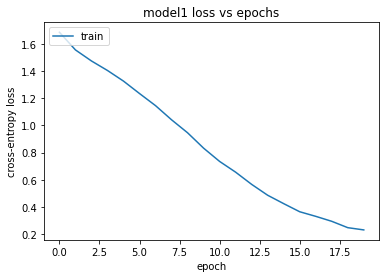

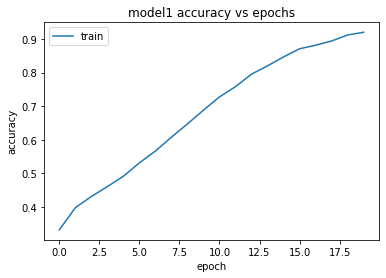

 
 
 
Required details for model2
 
898/898 [==============================] - 4s 5ms/step - loss: 0.3391 - accuracy: 0.8836
Emotion Classification Accuracy on the Training set: 0.8835556507110596
 
113/113 [==============================] - 1s 5ms/step - loss: 2.2094 - accuracy: 0.4544
Emotion Classification Accuracy on the Validation set: 0.45444414019584656
 
Running time for training the FNN: 24.502355337142944 ms
 
Parameters for the model:
 
{'name': 'sequential_1', 'layers': [{'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 2304), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'first_hidden_layer_input'}}, {'class_name': 'Dense', 'config': {'name': 'first_hidden_layer', 'trainable': True, 'batch_input_shape': (None, 2304), 'dtype': 'float32', 'units': 1568, 'activation': 'elu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regu

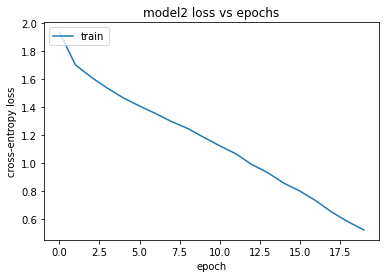

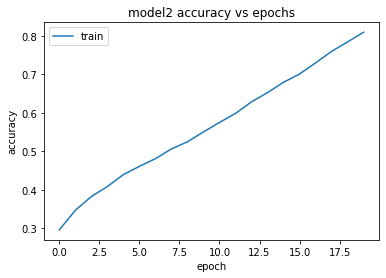

 
 
 
Required details for model3
 
898/898 [==============================] - 4s 5ms/step - loss: 0.2900 - accuracy: 0.9070
Emotion Classification Accuracy on the Training set: 0.9069629907608032
 
113/113 [==============================] - 1s 5ms/step - loss: 2.2753 - accuracy: 0.4695
Emotion Classification Accuracy on the Validation set: 0.469490110874176
 
Running time for training the FNN: 26.87890362739563 ms
 
Parameters for the model:
 
{'name': 'sequential_2', 'layers': [{'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 2304), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'first_hidden_layer_input'}}, {'class_name': 'Dense', 'config': {'name': 'first_hidden_layer', 'trainable': True, 'batch_input_shape': (None, 2304), 'dtype': 'float32', 'units': 2000, 'activation': 'elu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regular

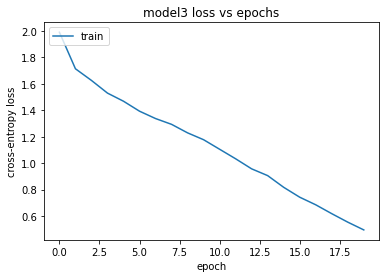

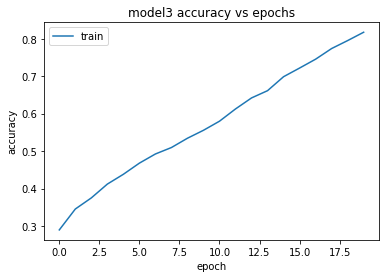

 
 
 
Required details for model4
 
898/898 [==============================] - 5s 5ms/step - loss: 0.3394 - accuracy: 0.8814
Emotion Classification Accuracy on the Training set: 0.8813612461090088
 
113/113 [==============================] - 1s 5ms/step - loss: 2.5049 - accuracy: 0.4531
Emotion Classification Accuracy on the Validation set: 0.45305100083351135
 
Running time for training the FNN: 29.2670316696167 ms
 
Parameters for the model:
 
{'name': 'sequential_3', 'layers': [{'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 2304), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'first_hidden_layer_input'}}, {'class_name': 'Dense', 'config': {'name': 'first_hidden_layer', 'trainable': True, 'batch_input_shape': (None, 2304), 'dtype': 'float32', 'units': 2000, 'activation': 'elu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regula

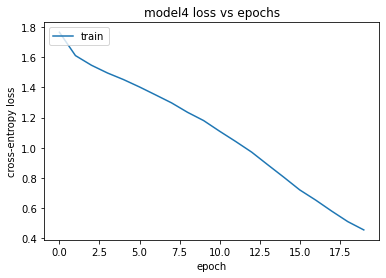

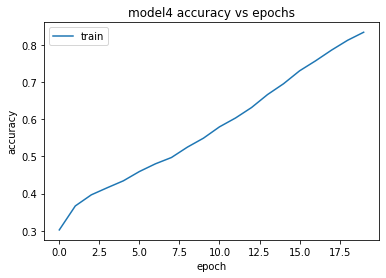

 
 
 
Required details for model5
 
898/898 [==============================] - 5s 6ms/step - loss: 1.2149 - accuracy: 0.6733
Emotion Classification Accuracy on the Training set: 0.6732732057571411
 
113/113 [==============================] - 1s 6ms/step - loss: 1.9507 - accuracy: 0.4478
Emotion Classification Accuracy on the Validation set: 0.4477570354938507
 
Running time for training the FNN: 32.77064371109009 ms
 
Parameters for the model:
 
{'name': 'sequential_4', 'layers': [{'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 2304), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'first_hidden_layer_input'}}, {'class_name': 'Dense', 'config': {'name': 'first_hidden_layer', 'trainable': True, 'batch_input_shape': (None, 2304), 'dtype': 'float32', 'units': 2000, 'activation': 'elu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regula

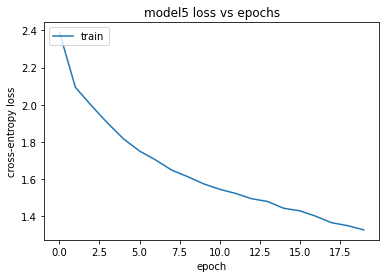

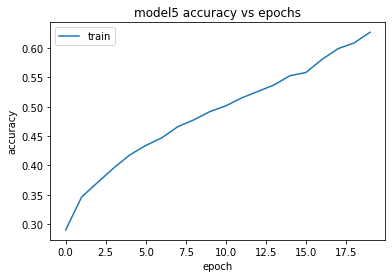

In [11]:
# print (time_to_train)
# for i in time_to_train:
#   print (sum(i))

validation_emotions=np.array(list(validation_data['emotion']))
validation_pixels=np.array(list(validation_data['pixels_int']))

flatten_validation_images = validation_pixels
validation_performances=[]
models=[model1,model2,model3,model4,model5]
model_names=['model1','model2','model3','model4','model5']
histories=[history1,history2,history3,history4,history5]
for i in range(len(models)):
  print (" ")
  print ("Required details for {}".format(model_names[i]))
  print (" ")
  performance1 = models[i].evaluate(flatten_train_images, to_categorical(train_emotions))
  print("Emotion Classification Accuracy on the Training set: {0}".format(performance1[1]))
  print (" ")
  performance2 = models[i].evaluate(flatten_validation_images, to_categorical(validation_emotions))
  validation_performances.append(performance2[1])
  print("Emotion Classification Accuracy on the Validation set: {0}".format(performance2[1]))
  print (" ")
  print ("Running time for training the FNN: {} ms".format(str(time_to_train[i][0])))
  print (" ")
  print ("Parameters for the model:")
  print (" ")
  print (models[i].get_config())
  print (" ")
  print (models[i].summary())


  print (" ")
  print('Number of Epochs used to train the model: ', len(histories[i].history['loss']))

  

  print(" ")
  # print(history.history.keys())
  # summarize history for loss
  plt.plot(histories[i].history['loss'])
  plt.title('{} loss vs epochs'.format(model_names[i]))
  plt.ylabel('cross-entropy loss')
  plt.xlabel('epoch')
  plt.legend(['train'], loc='upper left')
  plt.show()
  # summarize history for accuracy
  plt.plot(histories[i].history['accuracy'])
  plt.title('{} accuracy vs epochs'.format(model_names[i]))
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train'], loc='upper left')
  plt.show()

  print (" ")
  print (" ")

# performance = model1.evaluate(flatten_test_images, to_categorical(validation_emotions))
# print("Accuracy on Test samples: {0}".format(performance[1]))
# performance = model2.evaluate(flatten_test_images, to_categorical(validation_emotions))
# print("Accuracy on Test samples: {0}".format(performance[1]))
# performance = model3.evaluate(flatten_test_images, to_categorical(validation_emotions))
# print("Accuracy on Test samples: {0}".format(performance[1]))
# performance = model4.evaluate(flatten_test_images, to_categorical(validation_emotions))
# print("Accuracy on Test samples: {0}".format(performance[1]))
# performance = model5.evaluate(flatten_test_images, to_categorical(validation_emotions))
# print("Accuracy on Test samples: {0}".format(performance[1]))

### Answer:

Five different FNN models have been trained on the training dataset and evaluated on the validation dataset. The required details are shown above. 
The values in a tabular form is shown below:

Model name | Accuracy on Train dataset (%)| Accuracy on Validation dataset (%)| Training Time (ms) | Parameters Count
-----------|---------------------------|--------------------------------|---------------|--------------
model1          |94.28        |47.34     |26.95  |5,230,463
model2         |88.36     |45.44  |24.50   |5,154,807
model3      |90.70 |46.95   |26.87   |7,115,007
model4      |88.14    |45.31  |29.26   |7,439,029
model5        |67.33     |44.78 |32.77  |7,238,507

### (c.ii) (1 point) Run the best model that was found based on the validation set from question (c.i) on the testing set. Report the emotion classification accuracy on the testing set.

### Answer: 
### The best model that was found based on the validation set is:

In [12]:
# print (validation_performances)
max_validation=validation_performances.index(max(validation_performances))
print (model_names[max_validation])
print (models[max_validation].summary())

print("Emotion Classification Accuracy on the Validation set for the model: {} ".format(validation_performances[max_validation]))

model1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_hidden_layer (Dense)  (None, 1568)              3614240   
                                                                 
 second_hidden_layer (Dense)  (None, 784)              1230096   
                                                                 
 third_hidden_layer (Dense)  (None, 392)               307720    
                                                                 
 fourth_hidden_layer (Dense)  (None, 196)              77028     
                                                                 
 dense (Dense)               (None, 7)                 1379      
                                                                 
Total params: 5,230,463
Trainable params: 5,230,463
Non-trainable params: 0
_________________________________________________________________
None
Emotion Classification Accuracy on

### The emotion classification accuracy of the model on the testing dataset is: 

In [13]:
test_emotions=np.array(list(test_data['emotion']))
test_pixels=np.array(list(test_data['pixels_int']))

flatten_test_images = test_pixels

test_performance = models[max_validation].evaluate(flatten_test_images, to_categorical(test_emotions))
print("Emotion Classification Accuracy on the Testing set: {0}".format(test_performance[1]))

113/113 [==============================] - 1s 5ms/step - loss: 3.2297 - accuracy: 0.4728
Emotion Classification Accuracy on the Testing set: 0.47283366322517395


### (d) (4 points) Image classification with CNNs: In this part, you will use a convolutional neural network (CNN) to perform the emotion classification task.

In [14]:
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D


common_features_1 = [Conv2D(32, kernel_size=3, activation='relu', input_shape=(48,48,1)), 
            Conv2D(32, kernel_size=3, activation='relu'), 
            MaxPooling2D(pool_size=(2,2)),
            Conv2D(64, kernel_size=3, activation='relu'),
            Conv2D(64, kernel_size=3, activation='relu'),
            MaxPooling2D(pool_size=(2,2)), Flatten(),]
classifier_1 = [Dense(512, activation='relu'), Dense(len(emotions), activation='softmax'),]

cnn_model_1 = Sequential(common_features_1+classifier_1)



common_features_2 = [Conv2D(64, kernel_size=3, activation='relu', input_shape=(48,48,1),use_bias=True), 
            Conv2D(64, kernel_size=3, activation='relu',use_bias=True), 
            MaxPooling2D(pool_size=(2,2)),
            Conv2D(128, kernel_size=3, activation='relu',use_bias=True,  kernel_regularizer =tf.keras.regularizers.l2( l=0.001)),
            Conv2D(128, kernel_size=3, activation='relu',use_bias=True,  kernel_regularizer =tf.keras.regularizers.l2( l=0.001)),
            MaxPooling2D(pool_size=(2,2)), Flatten(),]
classifier_2 = [Dense(512, activation='relu',use_bias=True,  kernel_regularizer =tf.keras.regularizers.l2( l=0.01)), Dense(len(emotions), activation='softmax',use_bias=True),]

cnn_model_2 = Sequential(common_features_2+classifier_2)


common_features_3 = [Conv2D(64, kernel_size=3, activation='elu',input_shape=(48,48,1),use_bias=True), 
            Conv2D(64, kernel_size=3, activation='elu',padding='same',use_bias=True), 
            MaxPooling2D(pool_size=(2,2)),
            Conv2D(128, kernel_size=3, activation='elu',padding='same',use_bias=True), 
            MaxPooling2D(pool_size=(2,2)),
            Conv2D(128, kernel_size=3, activation='elu', strides=(2, 2),padding='same',use_bias=True,  kernel_regularizer =tf.keras.regularizers.l1( l=0.001)),
            Conv2D(128, kernel_size=3, activation='elu', strides=(2, 2),padding='same',use_bias=True, kernel_regularizer =tf.keras.regularizers.l1( l=0.001)),
            MaxPooling2D(pool_size=(2,2)), Flatten(),]
classifier_3 = [Dense(512, activation='elu',use_bias=True,  kernel_regularizer =tf.keras.regularizers.l1( l=0.01)),Dropout(0.25), Dense(len(emotions), activation='softmax',use_bias=True),]

cnn_model_3 = Sequential(common_features_3+classifier_3)



In [15]:
# print(cnn_model_1.summary())  # Compare number of parameteres against FFN

time_callback = TimeHistory()
cnn_model_1.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'],)
cnn_model_2.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'],)
cnn_model_3.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'],)
time_to_train_cnn=[]

train_images_3d = flatten_train_images.reshape(len(flatten_train_images),48,48,1)
test_images_3d = flatten_test_images.reshape(len(flatten_test_images),48,48,1)


cnn_history_1=cnn_model_1.fit(train_images_3d, to_categorical(train_emotions), epochs=15, batch_size=256,callbacks = [time_callback])
time_to_train_cnn.append(time_callback.times)
cnn_history_2=cnn_model_2.fit(train_images_3d, to_categorical(train_emotions), epochs=20, batch_size=256,callbacks = [time_callback])
time_to_train_cnn.append(time_callback.times)
cnn_history_3=cnn_model_3.fit(train_images_3d, to_categorical(train_emotions), epochs=20, batch_size=256,callbacks = [time_callback])
time_to_train_cnn.append(time_callback.times)



Epoch 1/15
113/113 [==============================] - 36s 70ms/step - loss: 1.6138 - accuracy: 0.3642
Epoch 2/15
113/113 [==============================] - 8s 69ms/step - loss: 1.3458 - accuracy: 0.4901
Epoch 3/15
113/113 [==============================] - 8s 69ms/step - loss: 1.1907 - accuracy: 0.5498
Epoch 4/15
113/113 [==============================] - 8s 70ms/step - loss: 1.0795 - accuracy: 0.5944
Epoch 5/15
113/113 [==============================] - 8s 69ms/step - loss: 0.9614 - accuracy: 0.6458
Epoch 6/15
113/113 [==============================] - 8s 68ms/step - loss: 0.8132 - accuracy: 0.7065
Epoch 7/15
113/113 [==============================] - 8s 68ms/step - loss: 0.6542 - accuracy: 0.7669
Epoch 8/15
113/113 [==============================] - 8s 68ms/step - loss: 0.4602 - accuracy: 0.8402
Epoch 9/15
113/113 [==============================] - 8s 69ms/step - loss: 0.2866 - accuracy: 0.9036
Epoch 10/15
113/113 [==============================] - 8s 68ms/step - loss: 0.1756 - accur

### (d.i) (3 points) Experiment on the validation set with different CNN hyper-parameters, e.g. layers, filter size, stride size, activation function, dropout, weight regularization, etc. For each hyper-parameter combination that you have used, please report the following: (1) emotion classification accuracy on the training and validation sets; (2) running time for training the FNN; (3) parameters for each CNN. How do these metrics compare to the FNN?

 
Required details for cnn_model_1
 
898/898 [==============================] - 8s 9ms/step - loss: 0.0309 - accuracy: 0.9948
Emotion Classification Accuracy on the Training set: 0.9947751760482788
 
113/113 [==============================] - 1s 9ms/step - loss: 2.9449 - accuracy: 0.5737
Emotion Classification Accuracy on the Validation set: 0.5736973881721497
 
Running time for training the CNN: 144.84634375572205 ms
 
Parameters for the model:
 
{'name': 'sequential_5', 'layers': [{'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 48, 48, 1), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'conv2d_input'}}, {'class_name': 'Conv2D', 'config': {'name': 'conv2d', 'trainable': True, 'batch_input_shape': (None, 48, 48, 1), 'dtype': 'float32', 'filters': 32, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_na

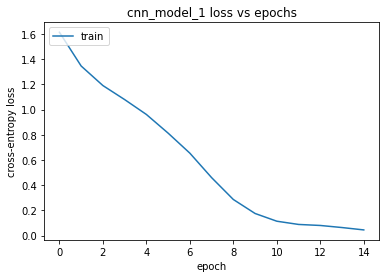

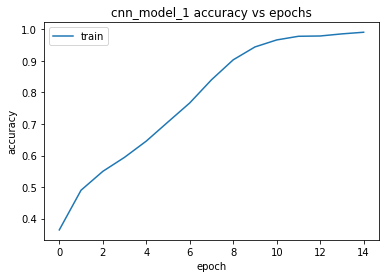

 
 
 
Required details for cnn_model_2
 
898/898 [==============================] - 10s 11ms/step - loss: 1.0117 - accuracy: 0.7653
Emotion Classification Accuracy on the Training set: 0.7652652263641357
 
113/113 [==============================] - 1s 11ms/step - loss: 1.5836 - accuracy: 0.5587
Emotion Classification Accuracy on the Validation set: 0.5586514472961426
 
Running time for training the CNN: 307.31507754325867 ms
 
Parameters for the model:
 
{'name': 'sequential_6', 'layers': [{'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 48, 48, 1), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'conv2d_4_input'}}, {'class_name': 'Conv2D', 'config': {'name': 'conv2d_4', 'trainable': True, 'batch_input_shape': (None, 48, 48, 1), 'dtype': 'float32', 'filters': 64, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer':

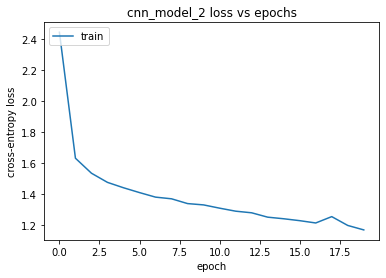

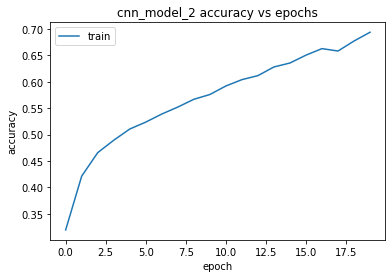

 
 
 
Required details for cnn_model_3
 
898/898 [==============================] - 10s 11ms/step - loss: 1.6395 - accuracy: 0.4426
Emotion Classification Accuracy on the Training set: 0.442613810300827
 
113/113 [==============================] - 1s 11ms/step - loss: 1.6722 - accuracy: 0.4271
Emotion Classification Accuracy on the Validation set: 0.42713847756385803
 
Running time for training the CNN: 316.84715700149536 ms
 
Parameters for the model:
 
{'name': 'sequential_7', 'layers': [{'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 48, 48, 1), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'conv2d_8_input'}}, {'class_name': 'Conv2D', 'config': {'name': 'conv2d_8', 'trainable': True, 'batch_input_shape': (None, 48, 48, 1), 'dtype': 'float32', 'filters': 64, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'groups': 1, 'activation': 'elu', 'use_bias': True, 'kernel_initializer': 

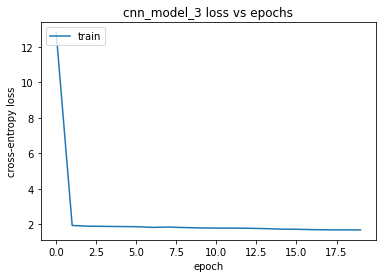

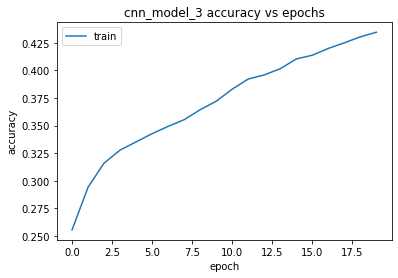

In [30]:
validation_images_3d = flatten_validation_images.reshape(len(flatten_validation_images),48,48,1)

validation_performances_cnn=[]
cnn_models=[cnn_model_1,cnn_model_2,cnn_model_3]
cnn_model_names=['cnn_model_1','cnn_model_2','cnn_model_3']
cnn_histories=[cnn_history_1,cnn_history_2,cnn_history_3]
for i in range(len(cnn_models)):
  print (" ")
  print ("Required details for {}".format(cnn_model_names[i]))
  print (" ")
  performance1_cnn = cnn_models[i].evaluate(train_images_3d, to_categorical(train_emotions))
  print("Emotion Classification Accuracy on the Training set: {0}".format(performance1_cnn[1]))
  print (" ")
  performance2_cnn = cnn_models[i].evaluate(validation_images_3d, to_categorical(validation_emotions))
  validation_performances_cnn.append(performance2_cnn[1])
  print("Emotion Classification Accuracy on the Validation set: {0}".format(performance2_cnn[1]))
  print (" ")
  print ("Running time for training the CNN: {} ms".format(str(time_to_train_cnn[i][0])))
  print (" ")
  print ("Parameters for the model:")
  print (" ")
  print (cnn_models[i].get_config())
  print (" ")
  print (cnn_models[i].summary())


  print (" ")
  print('Number of Epochs used to train the model: ', len(cnn_histories[i].history['loss']))

  

  print(" ")
  # print(history.history.keys())
  # summarize history for loss
  plt.plot(cnn_histories[i].history['loss'])
  plt.title('{} loss vs epochs'.format(cnn_model_names[i]))
  plt.ylabel('cross-entropy loss')
  plt.xlabel('epoch')
  plt.legend(['train'], loc='upper left')
  plt.show()
  # summarize history for accuracy
  plt.plot(cnn_histories[i].history['accuracy'])
  plt.title('{} accuracy vs epochs'.format(cnn_model_names[i]))
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train'], loc='upper left')
  plt.show()

  print (" ")
  print (" ")






# performance = cnn_model.evaluate(test_images_3d, to_categorical(test_emotions))

# print("Accuracy on Test samples: {0}".format(performance[1]))

### Answer:

Three different CNN models have been trained on the training dataset and evaluated on the validation dataset. The required details are shown above.
The values in a tabular form is shown below:

CNN Model number | Accuracy on Train dataset (%)| Accuracy on Validation dataset (%)| Training Time (ms) | Parameters Count
-----------|---------------------------|--------------------------------|---------------|--------------
1      | 99.48       |57.37  |144.84 ms  |2,723,303
2         |76.53   |55.87 |307.31 ms    | 5,571,527
3     | 44.26 |42.71   |316.84 ms  |476,231

As can be seen, 

1. The accuracy on train, validation, and test dataset in higher in CNN models than in FNN models. 

2. The number of parameters to train in a CNN model is also lesser than in FNN model. 

3. It is taking more time to train a CNN model than a FNN model.


### (d.ii) (1 point) Run the best model that was found based on the validation set from question (d.i) on the testing set. Report the emotion classification accuracy on the testing set. How does this metric compare to the FNN?

### Answer: 
### The best model that was found based on the validation set is:

In [31]:
max_validation_cnn=validation_performances_cnn.index(max(validation_performances_cnn))
print (cnn_model_names[max_validation_cnn])
print (cnn_models[max_validation_cnn].summary())

print("Emotion Classification Accuracy on the Validation set for the cnn model: {} ".format(validation_performances_cnn[max_validation_cnn]))

cnn_model_1
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 18, 18, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 9, 64)         0         
 2D)                                      

### The emotion classification accuracy of the model on the testing dataset is:

In [32]:
test_images_3d = flatten_test_images.reshape(len(flatten_test_images),48,48,1)

test_performance_cnn = cnn_models[max_validation_cnn].evaluate(test_images_3d, to_categorical(test_emotions))
print("Emotion Classification Accuracy on the Testing set for the CNN: {0}".format(test_performance_cnn[1]))
print ("  ")
print("And Emotion Classification Accuracy on the Testing set for the FNN: {0}".format(test_performance[1]))

113/113 [==============================] - 1s 8ms/step - loss: 2.7430 - accuracy: 0.5812
Emotion Classification Accuracy on the Testing set for the CNN: 0.5812203884124756
  
And Emotion Classification Accuracy on the Testing set for the FNN: 0.47283366322517395


### We can see that the Emotion Classification Accuracy on the Testing set for the CNN (58.12%) is better than that of the FNN (47.28%). 



### (e) (1 point) Bayesian optimization for hyper-parameter tuning: Instead of performing grid or random search to tune the hyper-parameters of the CNN, we can also try a model-based method for finding the optimal hyper-parameters through Bayesian optimization. This method performs a more intelligent search on the hyper-parameter space in order to estimate the best set of hyper-parameters for the data. Use publicly available libraries (e.g., hyperopt in Python) to perform a Bayesian optimization on the hyper-parameter space using the validation set. Report the emotion classification accuracy on the testing set.


In [19]:
!pip install hyperopt

In [20]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

In [21]:
def optimize_cnn(hyperparameter):
  
  # Defining model using hyperparameters 
  cnn_model = Sequential([Conv2D(32, kernel_size=hyperparameter['conv_kernel_size'], activation=hyperparameter['activation_fn'], input_shape=(48,48,1)), 
            Conv2D(32, kernel_size=hyperparameter['conv_kernel_size'], activation=hyperparameter['activation_fn']), 
            MaxPooling2D(pool_size=(2,2)), Dropout(hyperparameter['dropout_prob']),
            Conv2D(64, kernel_size=hyperparameter['conv_kernel_size'], activation=hyperparameter['activation_fn']),
            Conv2D(128, kernel_size=hyperparameter['conv_kernel_size'], activation=hyperparameter['activation_fn']), 
            MaxPooling2D(pool_size=(2,2)), Dropout(hyperparameter['dropout_prob']), 
            Flatten(),
            Dense(512, hyperparameter['activation_fn']), 
            Dense(len(emotions), activation='softmax'),])
  
  cnn_model.compile(optimizer=hyperparameter['optimizer'], loss='categorical_crossentropy', metrics=['accuracy'],)


  train_X, train_y = train_images_3d, train_emotions
  valid_X, valid_y = validation_images_3d, validation_emotions

  _ = cnn_model.fit(train_X, to_categorical(train_y), epochs=10, batch_size=256, verbose=0)
  # Evaluating accuracy on validation data
  performance = cnn_model.evaluate(valid_X, to_categorical(valid_y), verbose=0)

  print("Hyperparameters: ", hyperparameter, "Accuracy: ", performance[1])
  print("----------------------------------------------------")

  return({"status": STATUS_OK, "loss": -1*performance[1], "model":cnn_model})
  

# Defining search space for hyper-parameters
space = {
    # The kernel_size for convolutions:
    'conv_kernel_size': hp.choice('conv_kernel_size', [1, 3, 5]),
    # Uniform distribution in finding appropriate dropout values
    'dropout_prob': hp.uniform('dropout_prob', 0.1, 0.35),
    # Choice of optimizer 
    'optimizer': hp.choice('optimizer', ['Adam', 'sgd']),
    #choice of activation function
    'activation_fn': hp.choice('activation', ['relu', 'sigmoid', 'elu']),
}

trials = Trials()

# Finding the best hyperparameters
best = fmin(
        optimize_cnn,
        space,
        algo=tpe.suggest,
        trials=trials,
        max_evals=15,
    )

print("==================================")
print("Best Hyperparameters", best)


test_model = trials.results[np.argmin([r['loss'] for r in trials.results])]['model']

performance = test_model.evaluate(test_images_3d, to_categorical(test_emotions))

print("==================================")
print("Test Accuracy: ", performance[1])

Hyperparameters: 
{'activation_fn': 'sigmoid', 'conv_kernel_size': 5, 'dropout_prob': 0.15266477923626062, 'optimizer': 'sgd'}
Accuracy: 
0.24937307834625244
----------------------------------------------------
Hyperparameters: 
{'activation_fn': 'elu', 'conv_kernel_size': 3, 'dropout_prob': 0.31596639352914324, 'optimizer': 'Adam'}
Accuracy: 
0.5539147257804871
----------------------------------------------------
Hyperparameters: 
{'activation_fn': 'relu', 'conv_kernel_size': 1, 'dropout_prob': 0.1744496091134044, 'optimizer': 'Adam'}
Accuracy: 
0.47088325023651123
----------------------------------------------------
Hyperparameters: 
{'activation_fn': 'sigmoid', 'conv_kernel_size': 1, 'dropout_prob': 0.287162391630506, 'optimizer': 'sgd'}
Accuracy: 
0.24937307834625244
----------------------------------------------------
Hyperparameters: 
{'activation_fn': 'relu', 'conv_kernel_size': 5, 'dropout_prob': 0.2448089365657019, 'optimizer': 'Adam'}
Accuracy: 
0.592644214630127
------------

### The best hypermeters are: {'activation': 'relu', 'conv_kernel_size': 5, 'dropout_prob': 0.2448089365657019, 'optimizer': 'Adam'}


### The emotion classification accuracy on the testing set with the best hyperparameters is as follows:

In [22]:
performance = test_model.evaluate(test_images_3d, to_categorical(test_emotions))

print("==================================")
print("Test Accuracy: ", performance[1])

113/113 [==============================] - 1s 8ms/step - loss: 1.0938 - accuracy: 0.5940
Test Accuracy:  0.5940373539924622


### (f) (Bonus - 1 point) Fine-tuning: Use a pre-trained CNN (e.g., the pre-trained example of the MNIST dataset that we saw in class, or any other available pre-trained CNN) and fine-tune it on the FER data. Please experiment with different fine-tuning hyper-parameters (e.g., layers to fine-tune, regularization during fine-tuning) on the validation set. Report the classification accuracy for all hyper-parameter combinations on the validation set. Also report the classification accuracy with the best hyper-parameter combination on the testing set.

In [23]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.efficientnet import EfficientNetB0
from tensorflow.keras.applications.resnet50 import ResNet50

from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Activation, Flatten, Dropout, BatchNormalization
from keras.applications.inception_resnet_v2 import preprocess_input
from tensorflow.keras.layers import RandomFlip, RandomRotation
from tensorflow.keras import Input, Model
from tensorflow.image import grayscale_to_rgb
from tensorflow import convert_to_tensor


model_ft_1 = Sequential()
model_ft_1.add(ResNet50(input_shape=(48,48,3), include_top=False, pooling='avg', weights="imagenet"))
# model.trainable=False
model_ft_1.add(Dense(512))
model_ft_1.add(Activation('relu'))
model_ft_1.add(Dense(1024))
model_ft_1.add(Activation('relu'))
model_ft_1.add(Dense(512))
model_ft_1.add(Activation('relu'))
model_ft_1.add(Dropout(0.3))
model_ft_1.add(Dense(len(emotions), activation='softmax'))
model_ft_1.layers[0].trainable = False
model_ft_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



model_ft_2 = Sequential()
model_ft_2.add( MobileNetV2(input_shape=(48,48,3), include_top=False, pooling='avg', weights="imagenet"))
# model.trainable=False
model_ft_2.add(Dense(512))
model_ft_2.add(Activation('relu'))
model_ft_2.add(Dense(1024))
model_ft_2.add(Activation('relu'))
model_ft_2.add(Dense(512))
model_ft_2.add(Activation('relu'))
model_ft_2.add(Dropout(0.4))
model_ft_2.add(Dense(len(emotions), activation='softmax'))
model_ft_2.layers[0].trainable = False
model_ft_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])




model_ft_3 = Sequential()
model_ft_3 .add( MobileNetV2(input_shape=(48,48,3), include_top=False, pooling='avg', weights="imagenet"))
# model.trainable=False
model_ft_3 .add(Dense(512, kernel_regularizer=regularizers.l2(0.01)))
model_ft_3 .add(Activation('elu'))
model_ft_3 .add(Dense(1024, kernel_regularizer=regularizers.l2(0.01)))
model_ft_3 .add(Activation('elu'))
model_ft_3 .add(Dense(512, kernel_regularizer=regularizers.l2(0.01)))
model_ft_3 .add(Activation('elu'))
model_ft_3 .add(Dropout(0.3))
model_ft_3 .add(Dense(len(emotions), activation='softmax'))
model_ft_3 .layers[0].trainable = False
model_ft_3 .compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])




train_images_3d_3=grayscale_to_rgb(convert_to_tensor(train_images_3d))

history_ft_1 = model_ft_1.fit(train_images_3d_3, to_categorical(train_emotions), epochs=10, batch_size=256, verbose=1)
history_ft_2 = model_ft_2.fit(train_images_3d_3, to_categorical(train_emotions), epochs=15, batch_size=256, verbose=1)
history_ft_3 = model_ft_3.fit(train_images_3d_3, to_categorical(train_emotions), epochs=15, batch_size=256, verbose=1)


9420800/9406464 [==============================] - 0s 0us/step
Epoch 1/10
113/113 [==============================] - 19s 123ms/step - loss: 1.8139 - accuracy: 0.2447
Epoch 2/10
113/113 [==============================] - 13s 119ms/step - loss: 1.7682 - accuracy: 0.2650
Epoch 3/10
113/113 [==============================] - 13s 119ms/step - loss: 1.7483 - accuracy: 0.2810
Epoch 4/10
113/113 [==============================] - 13s 119ms/step - loss: 1.7168 - accuracy: 0.3006
Epoch 5/10
113/113 [==============================] - 13s 119ms/step - loss: 1.7078 - accuracy: 0.3065
Epoch 6/10
113/113 [==============================] - 14s 120ms/step - loss: 1.6895 - accuracy: 0.3203
Epoch 7/10
113/113 [==============================] - 14s 120ms/step - loss: 1.6880 - accuracy: 0.3198
Epoch 8/10
113/113 [==============================] - 13s 119ms/step - loss: 1.6691 - accuracy: 0.3344
Epoch 9/10
113/113 [==============================] - 14s 120ms/step - loss: 1.6706 - accuracy: 0.3336
Epoch 10/1

 
Required details for model_ft_1
 
898/898 [==============================] - 33s 35ms/step - loss: 1.6846 - accuracy: 0.3244
Emotion Classification Accuracy on the Training set: 0.32442787289619446
 
113/113 [==============================] - 4s 35ms/step - loss: 1.7151 - accuracy: 0.3104
Emotion Classification Accuracy on the Validation set: 0.3103928565979004
 
Parameters for the model:
 
Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrapp  (None, 512)              1049088   
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 512)              0         
 pper)                                               

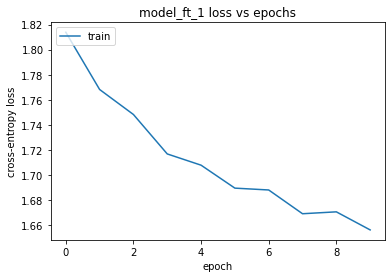

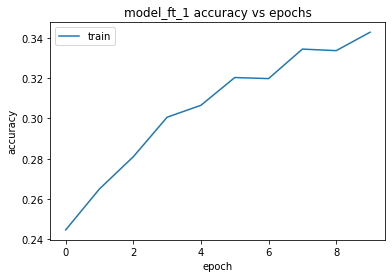

 
 
 
Required details for model_ft_2
 
898/898 [==============================] - 20s 21ms/step - loss: 0.0624 - accuracy: 0.9808
Emotion Classification Accuracy on the Training set: 0.9807725548744202
 
113/113 [==============================] - 2s 21ms/step - loss: 3.8308 - accuracy: 0.4230
Emotion Classification Accuracy on the Validation set: 0.42295902967453003
 
Parameters for the model:
 
Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 1280)             2257984   
 ional)                                                          
                                                                 
 module_wrapper_8 (ModuleWra  (None, 512)              655872    
 pper)                                                           
                                                                 
 module_wrapper_9 (ModuleWra  (None, 512)        

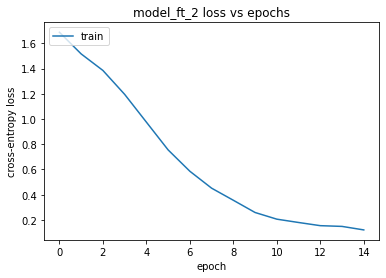

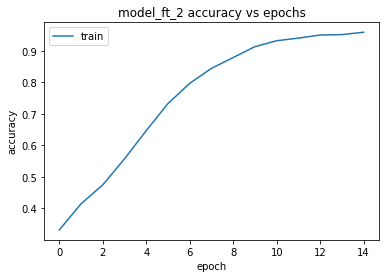

 
 
 
Required details for model_ft_3
 
898/898 [==============================] - 19s 20ms/step - loss: 0.3500 - accuracy: 0.8713
Emotion Classification Accuracy on the Training set: 0.8713295459747314
 
113/113 [==============================] - 2s 19ms/step - loss: 2.8958 - accuracy: 0.4322
Emotion Classification Accuracy on the Validation set: 0.4321537911891937
 
Parameters for the model:
 
Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 1280)             2257984   
 ional)                                                          
                                                                 
 module_wrapper_16 (ModuleWr  (None, 512)              655872    
 apper)                                                          
                                                                 
 module_wrapper_17 (ModuleWr  (None, 512)         

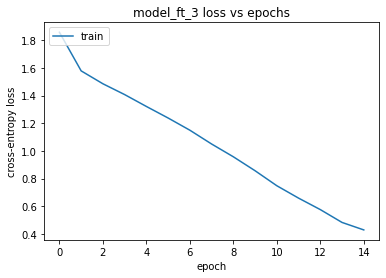

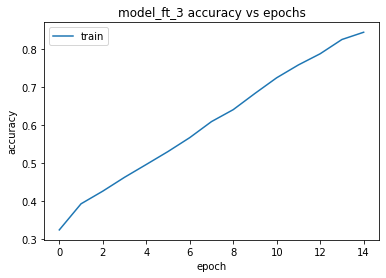

In [24]:
validation_images_3d_3=grayscale_to_rgb(convert_to_tensor(validation_images_3d))

# performance = model_ft_3.evaluate(validation_images_3d_3, to_categorical(validation_emotions))

# print("==================================")
# print("Test Accuracy: ", performance[1])


validation_performances_ft=[]
ft_models=[model_ft_1,model_ft_2,model_ft_3]
ft_model_names=['model_ft_1','model_ft_2','model_ft_3']
ft_histories=[history_ft_1,history_ft_2,history_ft_3]
for i in range(len(ft_models)):
  print (" ")
  print ("Required details for {}".format(ft_model_names[i]))
  print (" ")
  performance1_ft = ft_models[i].evaluate(train_images_3d_3, to_categorical(train_emotions))
  print("Emotion Classification Accuracy on the Training set: {0}".format(performance1_ft[1]))
  print (" ")
  performance2_ft = ft_models[i].evaluate(validation_images_3d_3, to_categorical(validation_emotions))
  validation_performances_ft.append(performance2_ft[1])
  print("Emotion Classification Accuracy on the Validation set: {0}".format(performance2_ft[1]))
  print (" ")
  print ("Parameters for the model:")
  print (" ")
  print (ft_models[i].summary())


  print (" ")
  print('Number of Epochs used to train the model: ', len(ft_histories[i].history['loss']))

  

  print(" ")
  # print(history.history.keys())
  # summarize history for loss
  plt.plot(ft_histories[i].history['loss'])
  plt.title('{} loss vs epochs'.format(ft_model_names[i]))
  plt.ylabel('cross-entropy loss')
  plt.xlabel('epoch')
  plt.legend(['train'], loc='upper left')
  plt.show()
  # summarize history for accuracy
  plt.plot(ft_histories[i].history['accuracy'])
  plt.title('{} accuracy vs epochs'.format(ft_model_names[i]))
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train'], loc='upper left')
  plt.show()

  print (" ")
  print (" ")




### Answer:

Three different fine-tuned models have been trained on the training dataset and evaluated on the validation dataset. The required details are shown above.
The values in a tabular form is shown below:

Model name | Accuracy on Train dataset (%)| Accuracy on Validation dataset (%) | Total Trainable Parameters Count
-----------|---------------------------|--------------------------------|--------------
model_ft_1     |32.44     |31.04   |2,102,791
model_ft_2         |98.08  |42.30  |1,709,575
model_ft_3     |87.13  |43.22 |1,709,575


### The best fine-tuned model that was found based on the validation set is:

In [42]:
max_validation_ft=validation_performances_ft.index(max(validation_performances_ft))
print (ft_model_names[max_validation_ft])
print (ft_models[max_validation_ft].summary())

print("Emotion Classification Accuracy on the Validation set for the fine-tuned model: {} ".format(validation_performances_ft[max_validation_ft]))

model_ft_3
Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 1280)             2257984   
 ional)                                                          
                                                                 
 module_wrapper_16 (ModuleWr  (None, 512)              655872    
 apper)                                                          
                                                                 
 module_wrapper_17 (ModuleWr  (None, 512)              0         
 apper)                                                          
                                                                 
 module_wrapper_18 (ModuleWr  (None, 1024)             525312    
 apper)                                                          
                                                                 
 module_wrapper_19 (ModuleWr  (None, 1024)

### The emotion classification accuracy of the best fine-tuned model (created using mobilenetv2) on the testing dataset is:

In [43]:
test_images_3d_3=grayscale_to_rgb(convert_to_tensor(test_images_3d))

test_performance_ft= ft_models[max_validation_ft].evaluate(test_images_3d_3, to_categorical(test_emotions))
print("Emotion Classification Accuracy on the Testing set for the fine-tuned model: {0}".format(test_performance_ft[1]))


113/113 [==============================] - 2s 20ms/step - loss: 2.8454 - accuracy: 0.4235
Emotion Classification Accuracy on the Testing set for the fine-tuned model: 0.42351630330085754


### (g) (Bonus - 1 point) Data augmentation: Data augmentation is a way to increase the size of our dataset and reduce overfitting, especially when we use complicated models with manyparameters to learn. Using any available toolbox or your own code, implement some of these techniques and augment the original FER data.

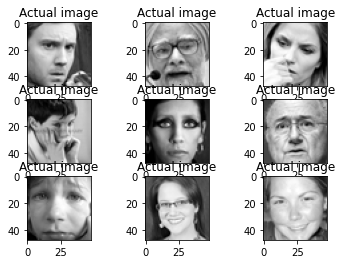

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:342: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:337: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


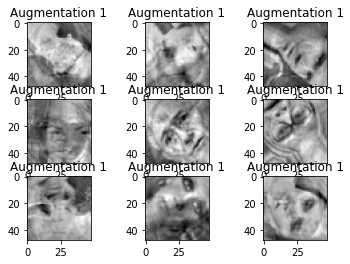

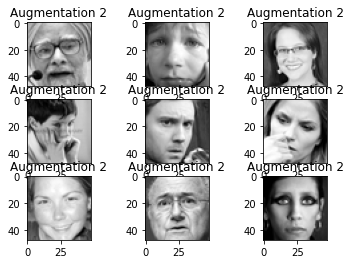

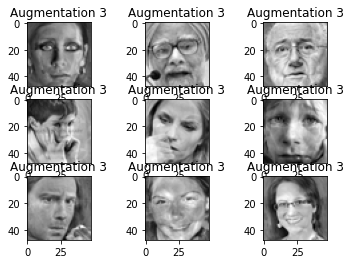

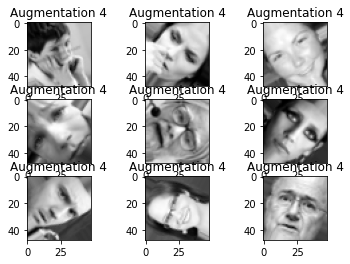

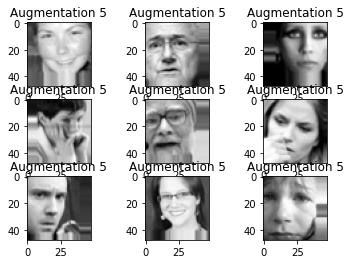

In [41]:
from keras.preprocessing.image import ImageDataGenerator

for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.title('Actual image')
  plt.imshow(train_images_3d[i].reshape(48, 48), cmap=plt.get_cmap('gray'))
plt.show()



shift=0.2
datagen1 = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True, zca_whitening=True, rotation_range=90, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True, vertical_flip=True)
datagen2 = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
datagen3 = ImageDataGenerator(zca_whitening=True)
datagen4 = ImageDataGenerator(rotation_range=90)
datagen5 = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift)


datagens=[datagen1, datagen2,datagen3, datagen4, datagen5]
labels=["Augmentation 1", "Augmentation 2", "Augmentation 3","Augmentation 4", "Augmentation 5"]
for ij,datagen in enumerate(datagens):
    datagen.fit(train_images_3d[:9])

    for X_batch, y_batch in datagen.flow(train_images_3d[:9], train_emotions[:9], batch_size=9):
        for i in range(0, 9):
            plt.subplot(330 + 1 + i)
            plt.title(labels[ij])
            plt.imshow(X_batch[i].reshape(48, 48), cmap=plt.get_cmap('gray'))
        plt.show()
        break

#### Answer:
Some outputs of the following data augmentation techniques are shown above:

1. datagen1 = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True, zca_whitening=True, rotation_range=90, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True, vertical_flip=True)
2. datagen2 = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
3. datagen3 = ImageDataGenerator(zca_whitening=True)
4. datagen4 = ImageDataGenerator(rotation_range=90)
5. datagen5 = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift)


Now, training a CNN model using datagen1:

In [44]:
#training a model on augmented dataset
datagen1.fit(train_images_3d)
it = datagen1.flow(train_images_3d, to_categorical(train_emotions))


common_features = [Conv2D(32, kernel_size=3, activation='relu', input_shape=(48,48,1)), 
            Conv2D(32, kernel_size=3, activation='relu'), 
            MaxPooling2D(pool_size=(2,2)),
            Conv2D(64, kernel_size=3, activation='relu'),
            Conv2D(64, kernel_size=3, activation='relu'),
            MaxPooling2D(pool_size=(2,2)), Flatten(),]
classifier = [Dense(512, activation='relu'), Dense(len(emotions), activation='softmax'),]

cnn_model = Sequential(common_features+classifier)
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'],)
history_cnn = cnn_model.fit_generator(it, epochs=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  app.launch_new_instance()


Epoch 1/10
898/898 [==============================] - 69s 76ms/step - loss: 1.8030 - accuracy: 0.2509
Epoch 2/10
898/898 [==============================] - 68s 76ms/step - loss: 1.7720 - accuracy: 0.2677
Epoch 3/10
898/898 [==============================] - 69s 77ms/step - loss: 1.7104 - accuracy: 0.3034
Epoch 4/10
898/898 [==============================] - 69s 77ms/step - loss: 1.6771 - accuracy: 0.3227
Epoch 5/10
898/898 [==============================] - 69s 77ms/step - loss: 1.6565 - accuracy: 0.3326
Epoch 6/10
898/898 [==============================] - 71s 79ms/step - loss: 1.6429 - accuracy: 0.3403
Epoch 7/10
898/898 [==============================] - 70s 78ms/step - loss: 1.6280 - accuracy: 0.3488
Epoch 8/10
898/898 [==============================] - 70s 78ms/step - loss: 1.6102 - accuracy: 0.3577
Epoch 9/10
898/898 [==============================] - 70s 78ms/step - loss: 1.5926 - accuracy: 0.3715
Epoch 10/10
898/898 [==============================] - 71s 79ms/step - loss: 1.583

The accuracy on the test dataset using this model is as follows:

In [46]:
performance = cnn_model.evaluate(test_images_3d, to_categorical(test_emotions))

print("Accuracy on Test samples: {0}".format(performance[1]))

113/113 [==============================] - 1s 9ms/step - loss: 2.1034 - accuracy: 0.1677
Accuracy on Test samples: 0.16773474216461182
